In [1]:
#Import modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency 

In [2]:
#Read CSV file into dataframe from GitHub repository.
url = 'https://raw.githubusercontent.com/wdrossii/Project_1/refs/heads/main/Resources/Impact_of_Remote_Work_on_Mental_Health.csv'
df = pd.read_csv(url)

#Print the first 5 rows of data to review the column headings.
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [3]:
#Print out the basic information about the dataframe to identify whether the number of responses is equal or if some responses are missing. Also, to review the data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [4]:
#Remove Employee_ID column, as there is already an index and this column does not add any other purpose or meaning. 
df = df.drop(['Employee_ID'], axis=1)

#Print the first 5 rows of the dataframe to ensure the Employee_ID column has been removed.
df.head()

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [5]:
#Assign integer values to each of the object values in the Stress_Level column. 
df['Stress_Level'].replace({'Low': 1, 'Medium': 2, 'High': 3}, inplace=True)

#Print the new values within the updated Stress_Level column.
df['Stress_Level']

C:\Users\melit\AppData\Local\Temp\ipykernel_159000\743924160.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Stress_Level'].replace({'Low': 1, 'Medium': 2, 'High': 3}, inplace=True)
C:\Users\melit\AppData\Local\Temp\ipykernel_159000\743924160.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

0       2
1       2
2       2
3       3
4       3
       ..
4995    3
4996    1
4997    3
4998    1
4999    1
Name: Stress_Level, Length: 5000, dtype: int64

In [6]:
#Assign integer values to each of the object values in the Productivity_Change column.
df['Productivity_Change'].replace({'Decrease': 1, 'No Change': 2, 'Increase': 3}, inplace=True)

#Print the new values within the updated Productivity_Change column.
df['Productivity_Change']

C:\Users\melit\AppData\Local\Temp\ipykernel_159000\1511947268.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Productivity_Change'].replace({'Decrease': 1, 'No Change': 2, 'Increase': 3}, inplace=True)
C:\Users\melit\AppData\Local\Temp\ipykernel_159000\1511947268.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent

0       1
1       3
2       2
3       3
4       1
       ..
4995    1
4996    1
4997    3
4998    3
4999    2
Name: Productivity_Change, Length: 5000, dtype: int64

In [7]:
#Assign integer values to each of the object values in the Satisfaction_with_Remote_Work column.
df['Satisfaction_with_Remote_Work'].replace({'Unsatisfied': 1, 'Neutral': 2, 'Satisfied': 3}, inplace=True)

#Print the new values within the updated Satisfaction_with_Remote_Work column.
df['Satisfaction_with_Remote_Work']

C:\Users\melit\AppData\Local\Temp\ipykernel_159000\363342768.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Satisfaction_with_Remote_Work'].replace({'Unsatisfied': 1, 'Neutral': 2, 'Satisfied': 3}, inplace=True)
C:\Users\melit\AppData\Local\Temp\ipykernel_159000\363342768.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future

0       1
1       3
2       1
3       1
4       1
       ..
4995    2
4996    3
4997    3
4998    1
4999    1
Name: Satisfaction_with_Remote_Work, Length: 5000, dtype: int64

In [8]:
#Since there are missing ("NaN") values within the Physical_Activity column, fill in the missing values with the word "None." 
df['Physical_Activity'].fillna('None', inplace=True)

#Print the new values within the updated Physical_Activity column.
df['Physical_Activity']

C:\Users\melit\AppData\Local\Temp\ipykernel_159000\4248405093.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Physical_Activity'].fillna('None', inplace=True)


0       Weekly
1       Weekly
2         None
3         None
4       Weekly
         ...  
4995    Weekly
4996      None
4997     Daily
4998     Daily
4999      None
Name: Physical_Activity, Length: 5000, dtype: object

In [9]:
#Assign integer values to each of the object values in the Physical_Activity column.
df['Physical_Activity'].replace({'Daily': 3, 'Weekly': 2, 'None': 1}, inplace=True)

#Print the new values within the updated Physical_Activity column.
df['Physical_Activity']

C:\Users\melit\AppData\Local\Temp\ipykernel_159000\2099219494.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Physical_Activity'].replace({'Daily': 3, 'Weekly': 2, 'None': 1}, inplace=True)


0       2
1       2
2       1
3       1
4       2
       ..
4995    2
4996    1
4997    3
4998    3
4999    1
Name: Physical_Activity, Length: 5000, dtype: int64

In [10]:
#Assign integer values to each of the object values in the Sleep_Quality column.
df['Sleep_Quality'].replace({'Good': 3, 'Average': 2, 'Poor': 1}, inplace=True)

#Print the new values within the updated Sleep_Quality column.
df['Sleep_Quality']

C:\Users\melit\AppData\Local\Temp\ipykernel_159000\1596180434.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep_Quality'].replace({'Good': 3, 'Average': 2, 'Poor': 1}, inplace=True)
C:\Users\melit\AppData\Local\Temp\ipykernel_159000\1596180434.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', T

0       3
1       3
2       1
3       1
4       2
       ..
4995    2
4996    2
4997    1
4998    2
4999    1
Name: Sleep_Quality, Length: 5000, dtype: int64

In [11]:
#Since there are missing ("NaN") values within the Mental_Health_Condition column, fill in the missing values with the word "Not Reported."
df['Mental_Health_Condition'].fillna('Not Reported', inplace=True)

#Print the new values within the updated Mental_Health_Condition column.
df['Mental_Health_Condition']

C:\Users\melit\AppData\Local\Temp\ipykernel_159000\4232021693.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mental_Health_Condition'].fillna('Not Reported', inplace=True)


0         Depression
1            Anxiety
2            Anxiety
3         Depression
4       Not Reported
            ...     
4995         Burnout
4996      Depression
4997         Burnout
4998    Not Reported
4999      Depression
Name: Mental_Health_Condition, Length: 5000, dtype: object

In [12]:
df.groupby(['Work_Location'])['Mental_Health_Condition'].value_counts()

Work_Location  Mental_Health_Condition
Hybrid         Anxiety                    428
               Depression                 421
               Burnout                    400
               Not Reported               400
Onsite         Burnout                    442
               Depression                 412
               Anxiety                    407
               Not Reported               376
Remote         Anxiety                    443
               Burnout                    438
               Not Reported               420
               Depression                 413
Name: count, dtype: int64

In [13]:
df_sorted = df.sort_values('Mental_Health_Condition').reset_index(drop=True)
df_sorted

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,32,Female,Designer,Healthcare,1,Hybrid,47,12,3,3,Anxiety,No,1,5,3,5,3,1,Europe
1,28,Male,Project Manager,Education,10,Onsite,49,15,3,3,Anxiety,No,1,4,2,2,2,1,Asia
2,25,Female,Designer,Healthcare,31,Remote,36,8,5,1,Anxiety,No,3,5,3,1,3,1,Asia
3,33,Female,Sales,Consulting,4,Onsite,55,14,2,3,Anxiety,Yes,3,5,1,2,1,2,Africa
4,48,Male,Marketing,Education,3,Remote,50,6,1,3,Anxiety,No,2,1,2,2,3,1,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,35,Female,Project Manager,Manufacturing,14,Hybrid,25,1,1,1,Not Reported,No,2,1,1,1,2,3,Africa
4996,47,Prefer not to say,Sales,Healthcare,23,Hybrid,54,6,4,2,Not Reported,Yes,2,5,2,3,3,2,South America
4997,34,Male,Project Manager,Finance,26,Onsite,38,10,1,1,Not Reported,No,1,4,2,5,3,1,Oceania
4998,52,Prefer not to say,Data Scientist,Education,6,Remote,30,12,5,3,Not Reported,Yes,3,3,2,5,3,2,Africa


(0.0, 500.0)

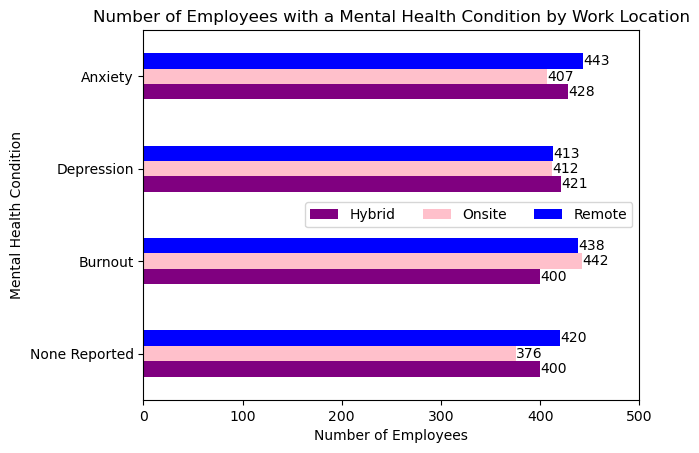

In [14]:
#Create an updated dataframe with the number of employees who endorsed a mental health condition (or did not report one) by work location.
hybrid = [400, 400, 421, 428]
onsite = [376, 442, 412, 407]
remote = [420, 438, 413, 443]
mh_condition = ['None Reported', 'Burnout', 'Depression', 'Anxiety']

df = pd.DataFrame({'Hybrid': hybrid, 'Onsite': onsite, 'Remote': remote}, index = mh_condition)

#Plot the values using a horizontal grouped bar graph.
ax = df.plot.barh(color={'Hybrid': 'purple', 'Onsite': 'pink', 'Remote': 'blue'})

#Add data labels.
for container in ax.containers:
    ax.bar_label(container)

#Add a title.
plt.title('Number of Employees with a Mental Health Condition by Work Location')

#Add a label to the y-axis.
ax.set_ylabel('Mental Health Condition')

#Add a label to the x-axis.
ax.set_xlabel('Number of Employees')

#Place the legend in the lower righthand corner of the graph.
ax.legend(loc='best', ncols=3)

#Set the lower limit to 0 and then the upper limit to 500.
ax.set_xlim(0, 500)

In [15]:
data = {
    'Hybrid': [400, 400, 421, 428],
    'Onsite': [376, 442, 412, 407],
    'Remote': [420, 438, 413, 443]
}

df = pd.DataFrame(data)

chi2_stat, p_val, dof, expected = chi2_contingency(df)

print("Expected Counts: ")
print(pd.DataFrame(expected, index=mh_condition, columns=df.columns))
print(f"\nChi2 Statistic: {chi2_stat: .4f}")
print(f"P-value: {p_val: .4f}")

Expected Counts: 
                 Hybrid    Onsite    Remote
None Reported  394.4408  391.5704  409.9888
Burnout        422.1440  419.0720  438.7840
Depression     410.9308  407.9404  427.1288
Anxiety        421.4844  418.4172  438.0984

Chi2 Statistic:  4.5809
P-value:  0.5986


In [16]:
#Group the average stress level by work location within each region.
df_sorted.groupby(['Region', 'Work_Location'])['Stress_Level'].mean()

Region         Work_Location
Africa         Hybrid           2.003448
               Onsite           2.015038
               Remote           2.075658
Asia           Hybrid           1.917910
               Onsite           1.973585
               Remote           2.000000
Europe         Hybrid           2.074733
               Onsite           1.963768
               Remote           2.091873
North America  Hybrid           2.003831
               Onsite           1.972222
               Remote           1.984848
Oceania        Hybrid           1.982394
               Onsite           1.993174
               Remote           1.993103
South America  Hybrid           2.083019
               Onsite           2.007018
               Remote           2.000000
Name: Stress_Level, dtype: float64

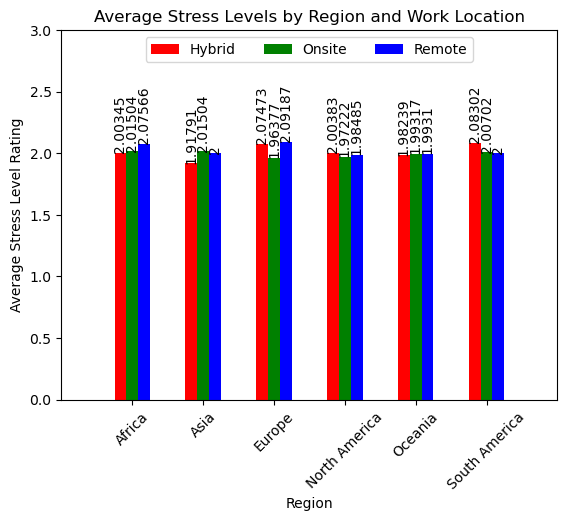

In [17]:
#Plot a grouped bar graph to illustrate the average stress level by work location by region.
hybrid = [2.003448, 1.917910, 2.074733, 2.003831, 1.982394, 2.083019]
onsite = [2.015038, 2.015038, 1.963768, 1.972222, 1.993174, 2.007018]
remote = [2.075658, 2.000000, 2.091873, 1.984848, 1.993103, 2.000000]
index = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

df = pd.DataFrame({'Hybrid': hybrid, 'Onsite': onsite, 'Remote': remote}, index=index)

#Plot the values using a horizontal grouped bar graph.
ax = df.plot.bar(color={'Hybrid': 'red', 'Onsite': 'green', 'Remote': 'blue'})

#Add a title.
plt.title('Average Stress Levels by Region and Work Location')

#Add a label to the y-axis.
ax.set_ylabel('Average Stress Level Rating')

#Add a label to the x-axis.
ax.set_xlabel('Region')

plt.xticks(rotation=45)

#Place the legend in the lower righthand corner of the graph.
ax.legend(loc='upper center', ncols=3)

#Set the upper and lower limits.
ax.set_xlim(-1,6)
ax.set_ylim(0, 3)

#Add data labels. 
for container in ax.containers:
    ax.bar_label(container, rotation=90)

In [18]:
#Group the average work life balance ratings by work location and whether the employee has access to mental health supports.
df_sorted.groupby(['Access_to_Mental_Health_Resources', 'Work_Location'])['Work_Life_Balance_Rating'].mean()

Access_to_Mental_Health_Resources  Work_Location
No                                 Hybrid           3.022700
                                   Onsite           2.945122
                                   Remote           2.953125
Yes                                Hybrid           3.022167
                                   Onsite           2.948592
                                   Remote           3.015892
Name: Work_Life_Balance_Rating, dtype: float64

Text(0.5, 0, 'Access to Mental Health Supports')

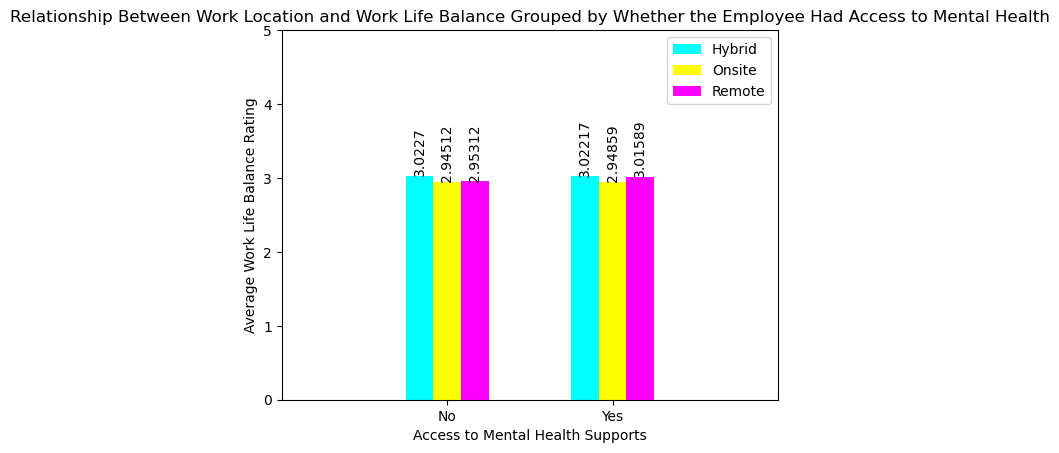

In [19]:
#Plot a grouped bar graph to illustrate the average work life balance rating by work location and whether the person has access to mental health supports.
#First, create lists for each Work Location and the corresponding index.
hybrid = [3.022700, 3.022167]
onsite = [2.945122, 2.948592]
remote = [2.953125, 3.015892]
index = ['No', 'Yes']

#Create a dataframe from the lists.
df = pd.DataFrame({'Hybrid': hybrid, 'Onsite': onsite, 'Remote': remote}, index = index)

#Plot a grouped bar graph.
ax = df.plot.bar(rot=0, color={'Hybrid': 'cyan', 'Onsite': 'yellow', 'Remote': 'magenta'})

#Set the upper and lower limits in the graph. 
ax.set_xlim(-1, 2)
ax.set_ylim(0, 5)

#Add data labels.
for container in ax.containers:
    ax.bar_label(container, rotation=90)

#Add a title to the graph.
plt.title('Relationship Between Work Location and Work Life Balance Grouped by Whether the Employee Had Access to Mental Health')

#Add a label to the y-axis.
ax.set_ylabel('Average Work Life Balance Rating')

#Add a label to the x-axis.
ax.set_xlabel('Access to Mental Health Supports')